In [6]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
browser = Browser('chrome')

In [8]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [27]:
# Find the table
table = soup.find('table', class_='table')

In [44]:
#wrote the code with the assistance from class material and Learning Assistant 
table = soup.find_all('tr', class_="data-row")
# Create an empty list
list_of_rows = []
# Loop through the scraped data to create a list of rows
for row in table:
    td = row.find_all('td')
    row = [col.text for col in td]
    list_of_rows.append(row)

In [58]:
list_of_rows 

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [60]:

# Find the table containing the data
table = soup.find('table', class_='table')

# Check if the table is found
if table:
    # Find all rows of data within the table
    rows = table.find_all('tr', class_='data-row')
    
    # Create an empty list to store rows
    list_of_rows = []
    
    # Loop through the scraped data to create a list of rows
    for row in rows:
        # Find all table cells (td) within the row
        cells = row.find_all('td')
        
        # Extract text from cells and create a list 
        row_data = [cell.get_text(strip=True) for cell in cells]
        
        # Append the row list to the list of rows
        list_of_rows.append(row_data)

    # Defined specific column names for the DataFrame
    column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
    
    #DataFrame from the list of rows and specified column names
    df = pd.DataFrame(list_of_rows, columns=column_names)
    
    #DataFrame
    print("DataFrame:")
    print(df)
    


DataFrame:
        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [61]:
df 

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [63]:
  #data types for each column
print("\nData Types:")
print(df.dtypes)


Data Types:
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [64]:
 # Convert data types of columns
df['id'] = df['id'].astype('object')
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype('int64')
df['ls'] = df['ls'].astype('int64')
df['month'] = df['month'].astype('int64')
df['min_temp'] = df['min_temp'].astype('float64')
df['pressure'] = df['pressure'].astype('float64')

 #DataFrame with updated data types
print("DataFrame:")
print(df)
    
    #data types for each column
print("\nData Types:")
print(df.dtypes)

DataFrame:
        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]

Data Types:
id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month              

In [65]:
# 1. How many months are there on Mars?

  #counts of each month and sort by month number
month_counts = df['month'].value_counts().sort_index()
    
    #the counts of months
print(month_counts)

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [68]:
# 2. How many Martian days' worth of data are there?

   #number of unique sols (Martian days)
num_sols = df['sol'].nunique()
    
   
num_sols

1867

In [69]:
 # DataFrame by month and the average min_temp for each month
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()
    
    #average low temperature by month
print(avg_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


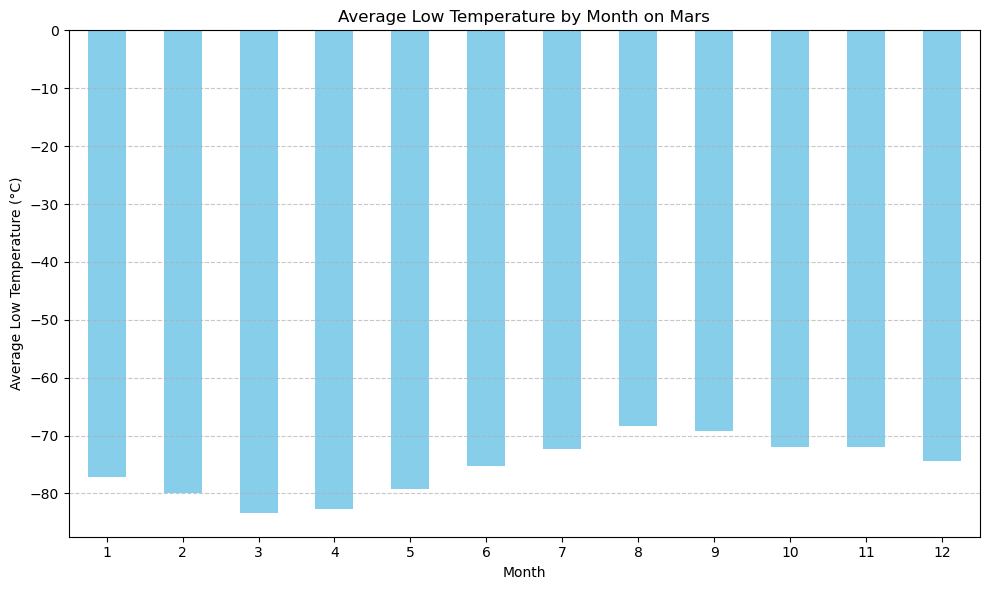

In [70]:
# Plotting avg temperature by month
plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar', color='skyblue')
    
    #plot title and labels
plt.title('Average Low Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
    
    #plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

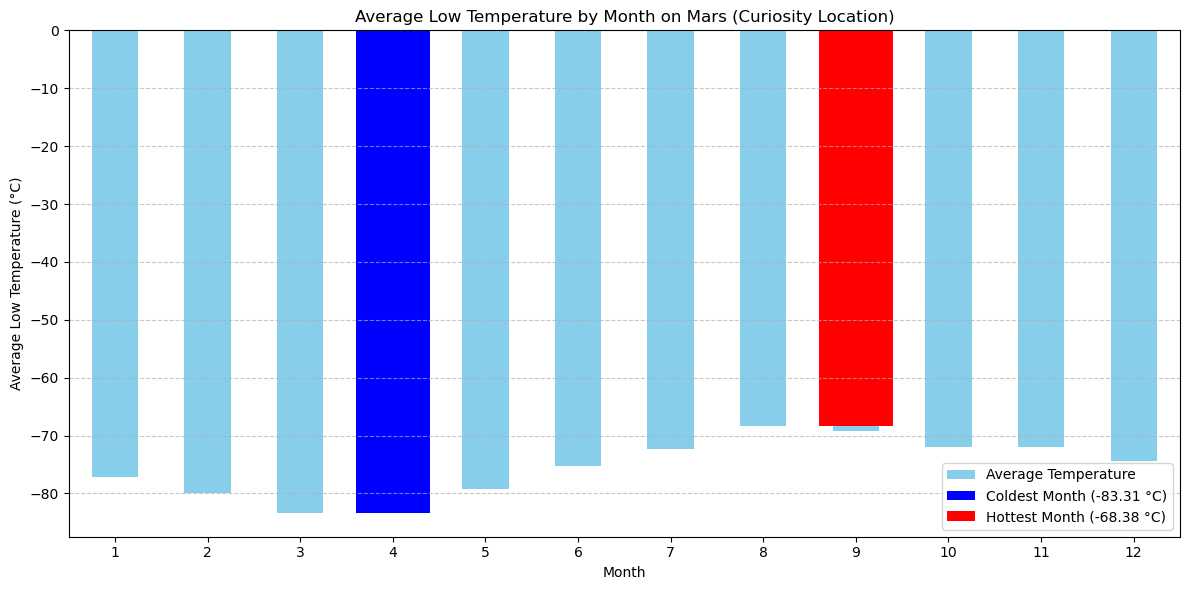

In [74]:
  #coldest and hottest months
coldest_month = avg_min_temp_by_month.idxmin()  # Month with the minimum average low temperature
hottest_month = avg_min_temp_by_month.idxmax()  # Month with the maximum average low temperature
    
    #minimum and maximum average temperatures
min_avg_temp = avg_min_temp_by_month.min()
max_avg_temp = avg_min_temp_by_month.max()
    
    # Plotting avg temperatures by month with highlighted coldest and hottest months
plt.figure(figsize=(12, 6))
    
    # Plot months' average temperatures 
avg_min_temp_by_month.plot(kind='bar', color='skyblue', label='Average Temperature')
    
    # Highlight the coldest and hottest months with distinctive colors
plt.bar(coldest_month, min_avg_temp, color='blue', label=f'Coldest Month ({min_avg_temp:.2f} °C)')
plt.bar(hottest_month, max_avg_temp, color='red', label=f'Hottest Month ({max_avg_temp:.2f} °C)')
    
    # Set plot title and labels
plt.title('Average Low Temperature by Month on Mars (Curiosity Location)')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
    
    #legend
plt.legend()
    
    # plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
    

In [75]:
 # Group the DataFrame by month and calculate the average pressure for each month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()
    
    # Print the average pressure by Martian month
print(avg_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


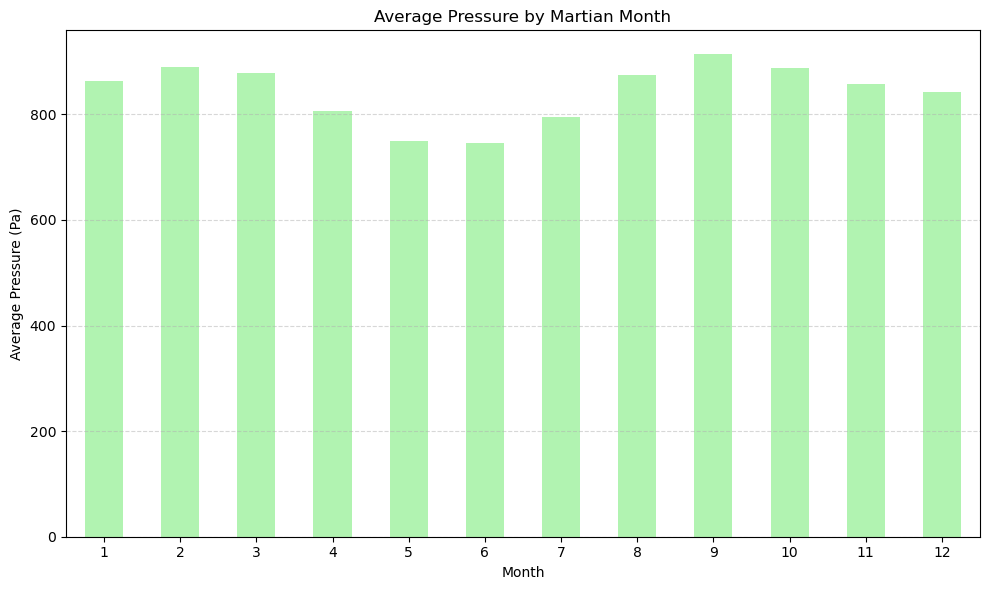

In [76]:

 #Plotting avg pressure by month
plt.figure(figsize=(10, 6))
    
    # Plotting the average pressure 
avg_pressure_by_month.plot(kind='bar', color='lightgreen', alpha=0.7)
    
    #plot title and labels
plt.title('Average Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
    
    # plot
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

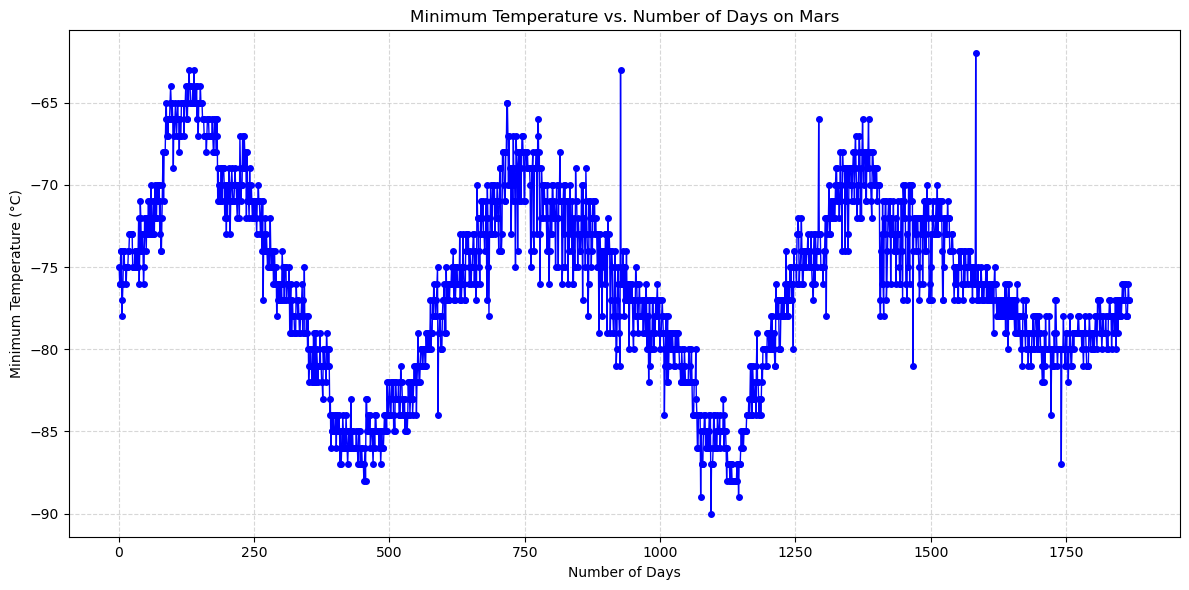

In [80]:
# Martian orbital period in Earth days 
martian_orbital_period_earth_days = 687

# Martian year duration in sols 
martian_year_duration_sols = 687

# number of Earth days in a Martian year
earth_days_in_martian_year = martian_orbital_period_earth_days / martian_year_duration_sols

min_temps = df['min_temp'].tolist()
    
    # Number of days (1867 days)
num_days = 1867
    
    # list of days from 1 to num_days
days = list(range(1, num_days + 1))
    
    # Plotting min temperatures with the number of days
plt.figure(figsize=(12, 6))
plt.plot(days, min_temps, color='blue', marker='o', linestyle='-', linewidth=1, markersize=4)
    
    # plot title and labels
plt.title('Minimum Temperature vs. Number of Days on Mars')
plt.xlabel('Number of Days')
plt.ylabel('Minimum Temperature (°C)')
    
   
plt.grid(True, linestyle='--', alpha=0.5)
    
  #plot  
plt.tight_layout()
plt.show()
